In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')

In [7]:
train

,Name,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Burnout_rate
0,Resource 1,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,Resource 2,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,Resource 3,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,Resource 4,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,Resource 5,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,Resource 6996,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,1,2,6.0,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,Resource 6997,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,0,2,4.0,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,Resource 6998,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,59,1,2,3.0,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,Resource 6999,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,21,1,5,8.0,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [8]:
train.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Burnout_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [10]:
train.isnull().sum()

Name                           0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Burnout_rate                   0
dtype: int64

In [11]:
train.shape

(7000, 24)

In [12]:

df=train.append(test,ignore_index=True)

In [13]:
df

,Name,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Burnout_rate,Employee_ID
0,Resource 1,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,NaN
1,Resource 2,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,NaN
2,Resource 3,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,NaN
3,Resource 4,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668,NaN
4,Resource 5,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,F,32.0,3,Single,Franklin,Sales,Directive,3.0,3,38,1,3,6.0,type2,2.0,1,-0.1048,0.7075,1.0,4,7,4,NaN,EID_22547
9996,NaN,F,NaN,2,Single,Franklin,Marketing,Conceptual,10.0,2,57,1,4,9.0,type2,1.0,3,0.7516,0.7075,3.0,4,8,3,NaN,EID_10066
9997,NaN,F,60.0,4,Single,Lebanon,Logistics,Analytical,35.0,1,69,0,2,9.0,type3,3.0,3,-1.8176,-0.4537,NaN,4,8,4,NaN,EID_7126
9998,NaN,F,51.0,1,Married,Springfield,IT,Behavioral,23.0,1,30,0,2,6.0,type3,1.0,5,0.7516,-0.4537,2.0,3,9,2,NaN,EID_4929


In [14]:
df['Work_Life_balance']=df['Work_Life_balance'].fillna(method='bfill')
df['VAR2']=df['VAR2'].fillna(method='bfill')
df['VAR4']=df['VAR4'].fillna(method='bfill')
df['Pay_Scale']=df['Pay_Scale'].fillna(method='bfill')

In [15]:

a=['Age','Time_of_service']
for i in a:
  df[i]=df[i].fillna(df[i].mean())

In [17]:
train = df[df['Burnout_rate'].isnull()==False]
test = df[df['Burnout_rate'].isnull()==True]

In [18]:
del test['Burnout_rate']

In [20]:
a=['Gender','Relationship_Status','Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits']
for i in a:
  loc = np.append(train[i].values, test[i].values, axis=0)
  from sklearn.preprocessing import LabelEncoder
  l=LabelEncoder()
  l.fit(list(set(loc)))
  train[i]=l.transform(train[i])
  test[i]=l.transform(test[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
train_df=train

In [22]:
del train_df['Name']

In [29]:
del train_df['Employee_ID']

In [30]:
X = train_df.drop(labels=['Burnout_rate'], axis=1)
y = train_df['Burnout_rate'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=42)

In [31]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((5950, 22), (5950,), (1050, 22), (1050,))

In [32]:

from math import sqrt 
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [33]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'dart',  
         'metric': 'l2_root',
         'learning_rate': 0.01, 
         'num_iterations': 1000,
         'num_leaves': 69,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 6,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSE:', sqrt(mean_squared_error(y_cv, y_pred_lgbm)))

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid_0's rmse: 0.201448
[200]	valid_0's rmse: 0.205541
[300]	valid_0's rmse: 0.199822
[400]	valid_0's rmse: 0.195692
[500]	valid_0's rmse: 0.193245
[600]	valid_0's rmse: 0.192897
[700]	valid_0's rmse: 0.191943
[800]	valid_0's rmse: 0.191767
[900]	valid_0's rmse: 0.19084
[1000]	valid_0's rmse: 0.190651
RMSE: 0.19065096420173852


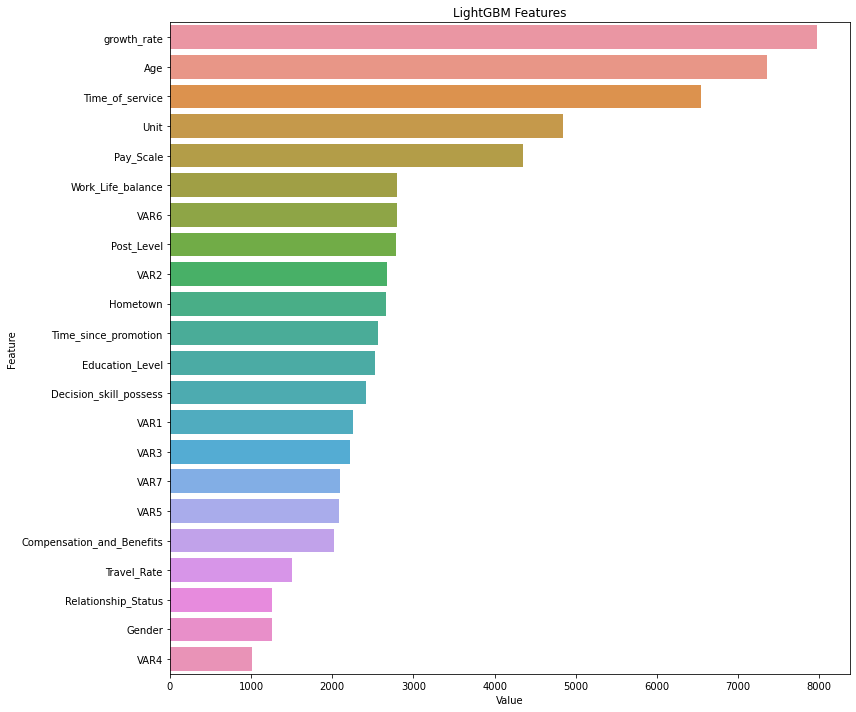

In [34]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [35]:
c=test['Name']
Xtest = test
del Xtest['Name']

In [37]:
del Xtest['Employee_ID']

In [38]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=20, shuffle=True, random_state=2**30)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #lgbm = LGBMRegressor(**param)
    lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=300,random_state=2**30, max_depth=31, learning_rate=0.1, n_estimators=10000, min_child_samples=30, subsample=0.90,bagging_fraction=0.9)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_error(y_test,y_pred_lgbm)))

    errlgb.append(sqrt(mean_squared_error(y_test, y_pred_lgbm)))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

RMSLE LGBM:  0.19703370039976215
RMSLE LGBM:  0.1923755228265427
RMSLE LGBM:  0.19751374952861783
RMSLE LGBM:  0.202313317711926
RMSLE LGBM:  0.18270950975327468
RMSLE LGBM:  0.18487810398292423
RMSLE LGBM:  0.17934421909046896
RMSLE LGBM:  0.17386152305337843
RMSLE LGBM:  0.17353836576210155
RMSLE LGBM:  0.1927003964241958
RMSLE LGBM:  0.1857300009317303
RMSLE LGBM:  0.1922900118605874
RMSLE LGBM:  0.18190794300542001
RMSLE LGBM:  0.18184421225876293
RMSLE LGBM:  0.16190931036694312
RMSLE LGBM:  0.19038379913835288
RMSLE LGBM:  0.17317627775627964
RMSLE LGBM:  0.17238819071471578
RMSLE LGBM:  0.19280423912570924
RMSLE LGBM:  0.1908965357457401


In [39]:
100-np.mean(errlgb,0)*100

81.50200535281283

In [40]:

lgbm_final = np.expm1(np.mean(y_pred_totlgb,0))
lgbm_final

array([0.22414952, 0.21781375, 0.22321743, ..., 0.19993834, 0.21597425,
       0.20773681])